# Problem Statement

Now-a-days the computer networks usage is growing dynamically and so the large increase of the number of the applications running on the top of it so there is the need of the highly securable network. As many systems are suffering from security vulnerabilities. Hence detecting vulnerabilities in the system in the network has been more important and needs to be done as precise as possible. In this notebook, model is trained on NSL-KDD dataset to detect the attacks on the network.
## Network Intrusion Detection using AI/ML

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import svm
from sklearn import metrics

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Loading the NSL-KDD dataset

In [2]:
data=pd.read_csv("nsl-kdd/KDDTrain+.txt")

In [3]:
data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


# Assigning the columns

In [4]:
columns=(['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [5]:
data.columns=columns

In [6]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [8]:
data.loc[data['outcome']=="normal", "outcome"]='normal'
data.loc[data['outcome']!='normal', "outcome"]='attack'

In [9]:
def scaling(df, columns):
    scaler=RobustScaler()
    scaler_tf=scaler.fit_transform(df)
    final_df=pd.DataFrame(scaler_tf, columns=columns)
    return final_df

categorical_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']

def preprocess(df):
    df_num=df.drop(categorical_cols, axis=1)
    cols=df_num.columns
    scaled_df=scaling(df_num, cols)
    
    df.drop(labels=cols, axis="columns", inplace=True)
    df[cols]=scaled_df[cols]
    
    df.loc[df['outcome']=="normal", "outcome"]=0
    df.loc[df['outcome']!=0, "outcome"]=1
    
    df=pd.get_dummies(df, columns = ['protocol_type', 'service', 'flag'])
    return df

In [10]:
scaled_train_df=preprocess(data)

# Principal Component Analysis (PCA)

In [11]:
x=scaled_train_df.drop(['outcome', 'level'], axis=1).values
y=scaled_train_df['outcome'].values
y_reg=scaled_train_df['level'].values

pca=PCA(n_components=20)
pca=pca.fit(x)
x_tf=pca.transform(x)
y=y.astype('int')
print("Total Number of original features is {} and total number of reduced features is {}".format(x.shape[1], x_tf.shape[1]))

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
X_train_tf, X_test_tf, y_train_tf, y_test_tf=train_test_split(x_tf, y, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg=train_test_split(x, y_reg, test_size=0.2, random_state=42)

Total Number of original features is 122 and total number of reduced features is 20


# Finding the metrics

In [12]:
kernal_evals=dict()
def classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy=metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy=metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision=metrics.precision_score(y_train, model.predict(X_train))
    test_precision=metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall=metrics.recall_score(y_train, model.predict(X_train))
    test_recall=metrics.recall_score(y_test, model.predict(X_test))
    
    kernal_evals[str(name)]=[train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print(str(name) + ":-" + " Training Accuracy: " + " {} ".format(train_accuracy*100) + "and Test Accuracy: " + " {}".format(test_accuracy*100))
    print(str(name) + ":-" + " Training Precesion: " + " {} ".format(train_precision*100) + "and Test Precision: " + " {}".format(test_precision*100))
    print(str(name) + ":-" + " Training Recall: " +  " {} ".format(train_recall*100) + "and Test Recall: " + " {}".format(test_recall*100))
    
    actual=y_test
    predicted=model.predict(X_test)
    confusion_matrix=metrics.confusion_matrix(actual, predicted)
    graph=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal', 'attack'])

    fig, ax=plt.subplots(figsize=(10,10))
    ax.grid(False)
    graph.plot(ax=ax)

# Logistic Regression

Logistic Regression:- Training Accuracy:  87.45150183077487 and Test Accuracy:  87.16808890652908
Logistic Regression:- Training Precesion:  88.6673757099862 and Test Precision:  88.72132923966046
Logistic Regression:- Training Recall:  83.68680720189658 and Test Recall:  83.1992548056567


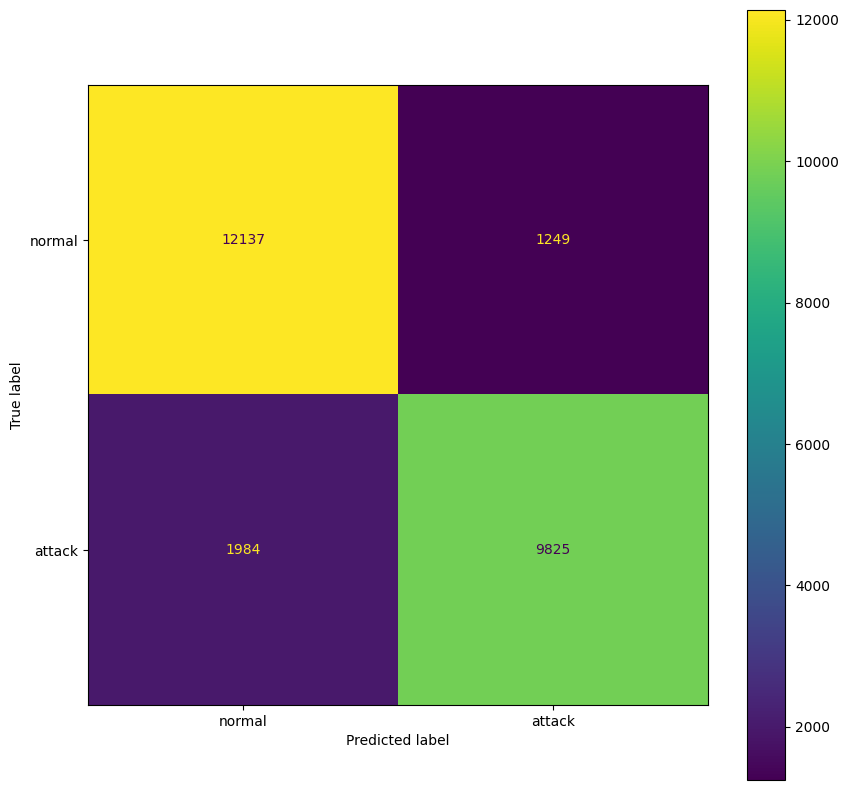

In [13]:
lr=LogisticRegression().fit(X_train, y_train)
classification(lr, "Logistic Regression", X_train, X_test, y_train, y_test)

# k Nearest Neighbors (kNN)

KNeighborsClassifier:- Training Accuracy:  99.05236313841452 and Test Accuracy:  98.93629688430245
KNeighborsClassifier:- Training Precesion:  99.22512234910276 and Test Precision:  99.05636317266003
KNeighborsClassifier:- Training Recall:  98.73133850195424 and Test Recall:  98.67050554661698


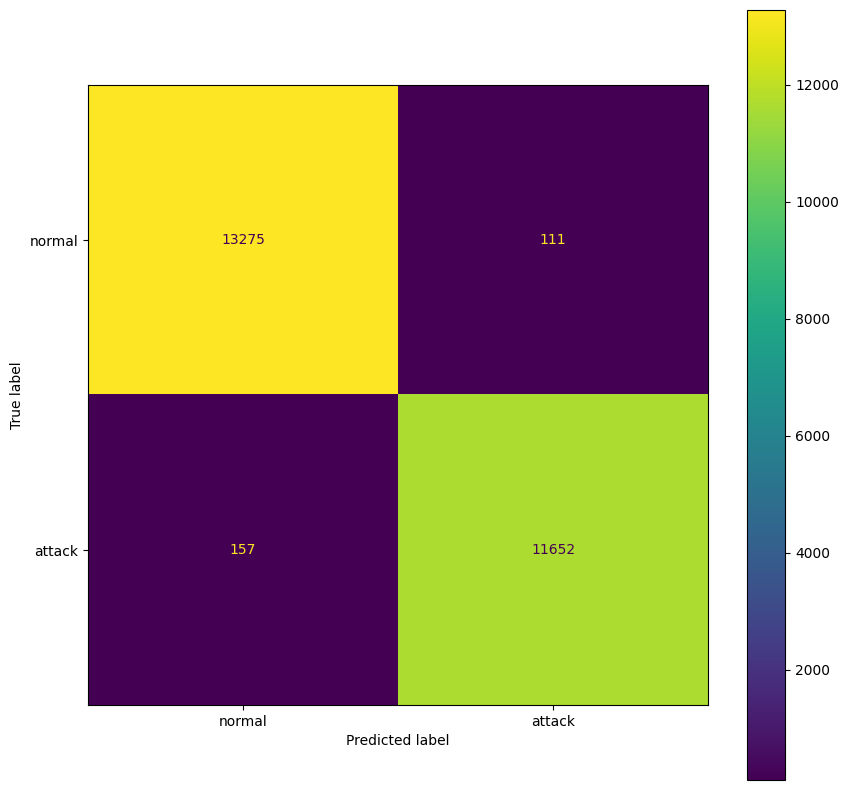

In [14]:
knn=KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
classification(knn, "KNeighborsClassifier", X_train, X_test, y_train, y_test)

# Naive Bayes

GaussianNB:- Training Accuracy:  91.80269307480874 and Test Accuracy:  91.60547727723754
GaussianNB:- Training Precesion:  92.62657528189256 and Test Precision:  92.53246753246754
GaussianNB:- Training Recall:  89.47907990004485 and Test Recall:  89.29629943263613


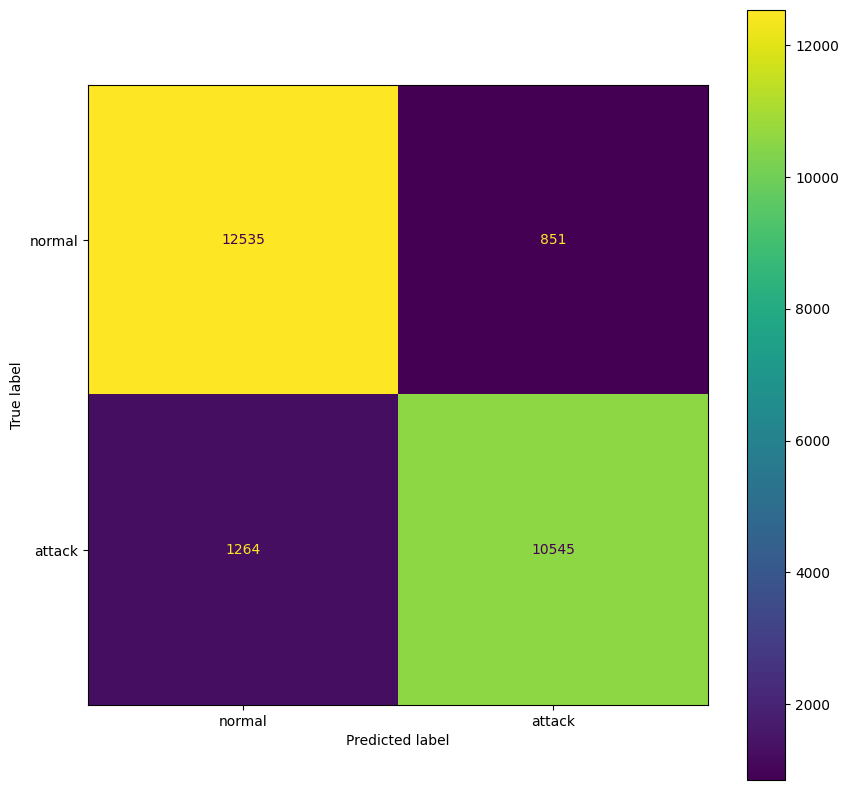

In [15]:
gnb=GaussianNB().fit(X_train, y_train)
classification(gnb, "GaussianNB", X_train, X_test, y_train, y_test)

# Support Vector Machine (SVM)

Linear SVC(LBasedImpl):- Training Accuracy:  97.23746489774453 and Test Accuracy:  97.04306410001985
Linear SVC(LBasedImpl):- Training Precesion:  97.93821166532408 and Test Precision:  97.60757314974182
Linear SVC(LBasedImpl):- Training Recall:  96.0765468486363 and Test Recall:  96.04538911000084


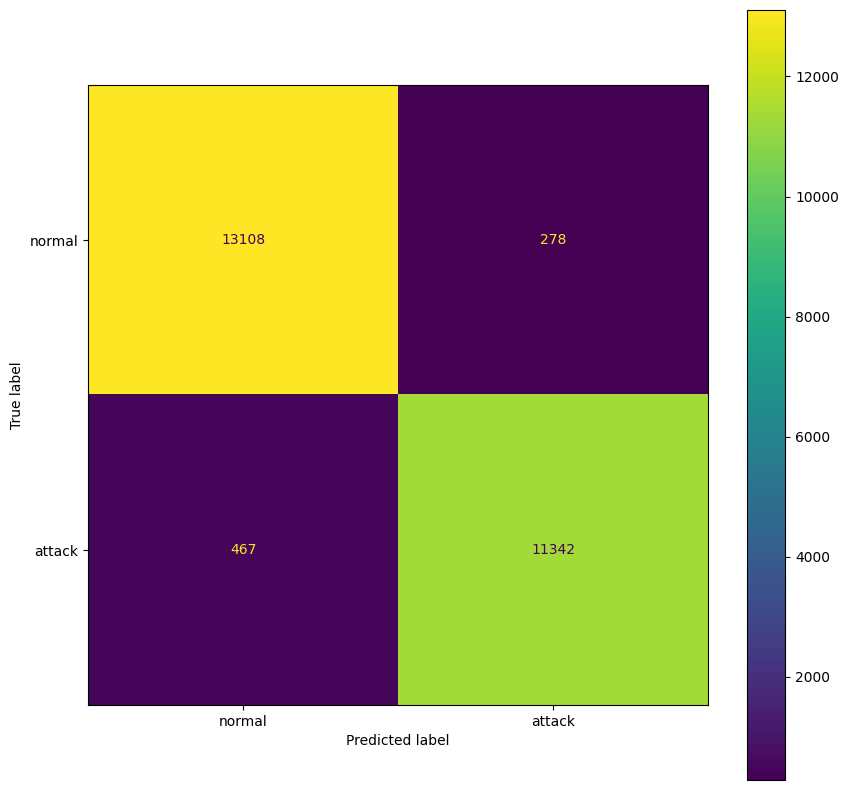

In [16]:
lin_svc=svm.LinearSVC().fit(X_train, y_train)
classification(lin_svc, "Linear SVC(LBasedImpl)", X_train, X_test, y_train, y_test)

# Decision Tree

DecisionTreeClassifier:- Training Accuracy:  99.99404626055548 and Test Accuracy:  99.86505258979956
DecisionTreeClassifier:- Training Precesion:  100.0 and Test Precision:  99.84759969519939
DecisionTreeClassifier:- Training Recall:  99.98718523739348 and Test Recall:  99.86451011940046


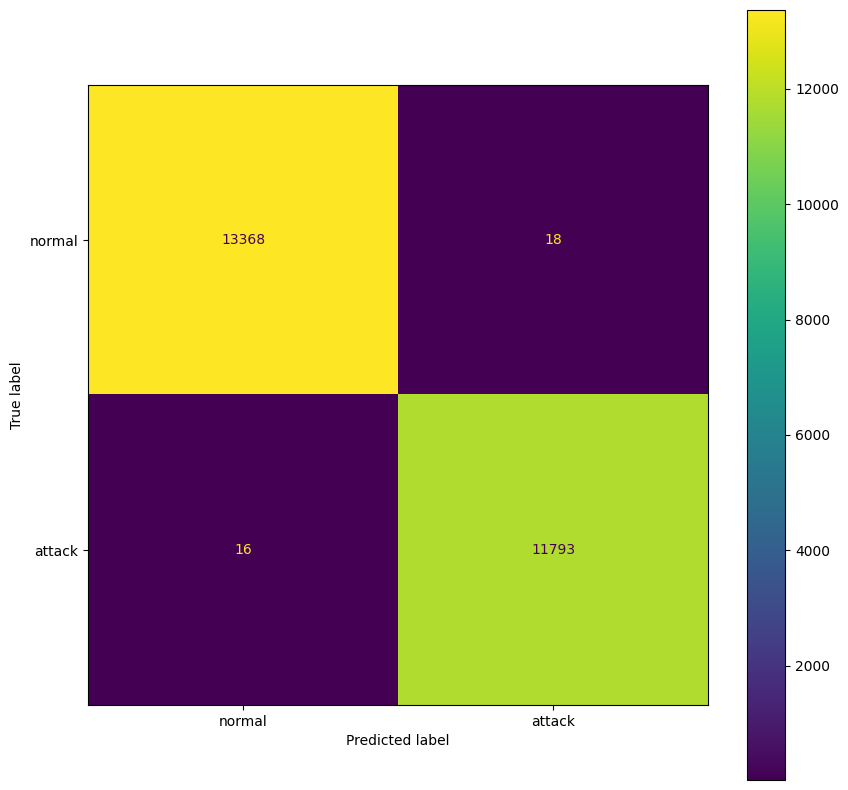

In [17]:
dt=DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
tdt=DecisionTreeClassifier().fit(X_train, y_train)
classification(tdt, "DecisionTreeClassifier", X_train, X_test, y_train, y_test)

# Columns Importance

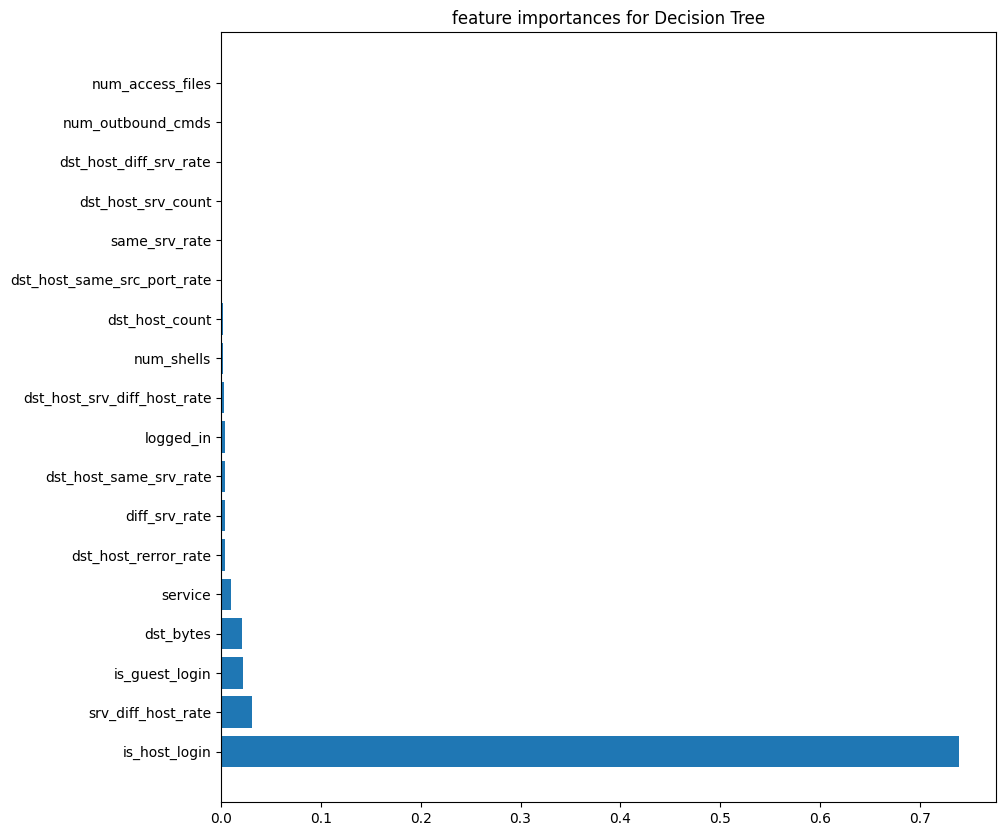

In [18]:
def f_importances(coef, names, top=-1):
    imp=coef
    imp, names=zip(*sorted(list(zip(imp, names))))

    if top==-1:
        top=len(names)
    
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names=data.drop(['outcome', 'level'] , axis=1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

[Text(0.5, 0.875, 'x[5] <= -0.056\ngini = 0.497\nsamples = 100777\nvalue = [53956, 46821]'),
 Text(0.25, 0.625, 'x[65] <= 0.5\ngini = 0.149\nsamples = 46560\nvalue = [3778, 42782]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[6] <= 0.005\ngini = 0.061\nsamples = 43088\nvalue = [1358, 41730]'),
 Text(0.0625, 0.125, 'gini = 0.031\nsamples = 42229\nvalue = [661, 41568]'),
 Text(0.1875, 0.125, 'gini = 0.306\nsamples = 859\nvalue = [697, 162]'),
 Text(0.375, 0.375, 'x[30] <= -0.211\ngini = 0.422\nsamples = 3472\nvalue = [2420, 1052]'),
 Text(0.3125, 0.125, 'gini = 0.021\nsamples = 1033\nvalue = [11, 1022]'),
 Text(0.4375, 0.125, 'gini = 0.024\nsamples = 2439\nvalue = [2409, 30]'),
 Text(0.75, 0.625, 'x[56] <= 0.5\ngini = 0.138\nsamples = 54217\nvalue = [50178, 4039]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[9] <= 0.5\ngini = 0.066\nsamples = 51813\nvalue = [50032.0, 1781.0]'),
 Text(0.5625, 0.125, 'gini = 0.027\nsamples = 49719\nvalue = [49043, 676]'),
 Text(0.6875,

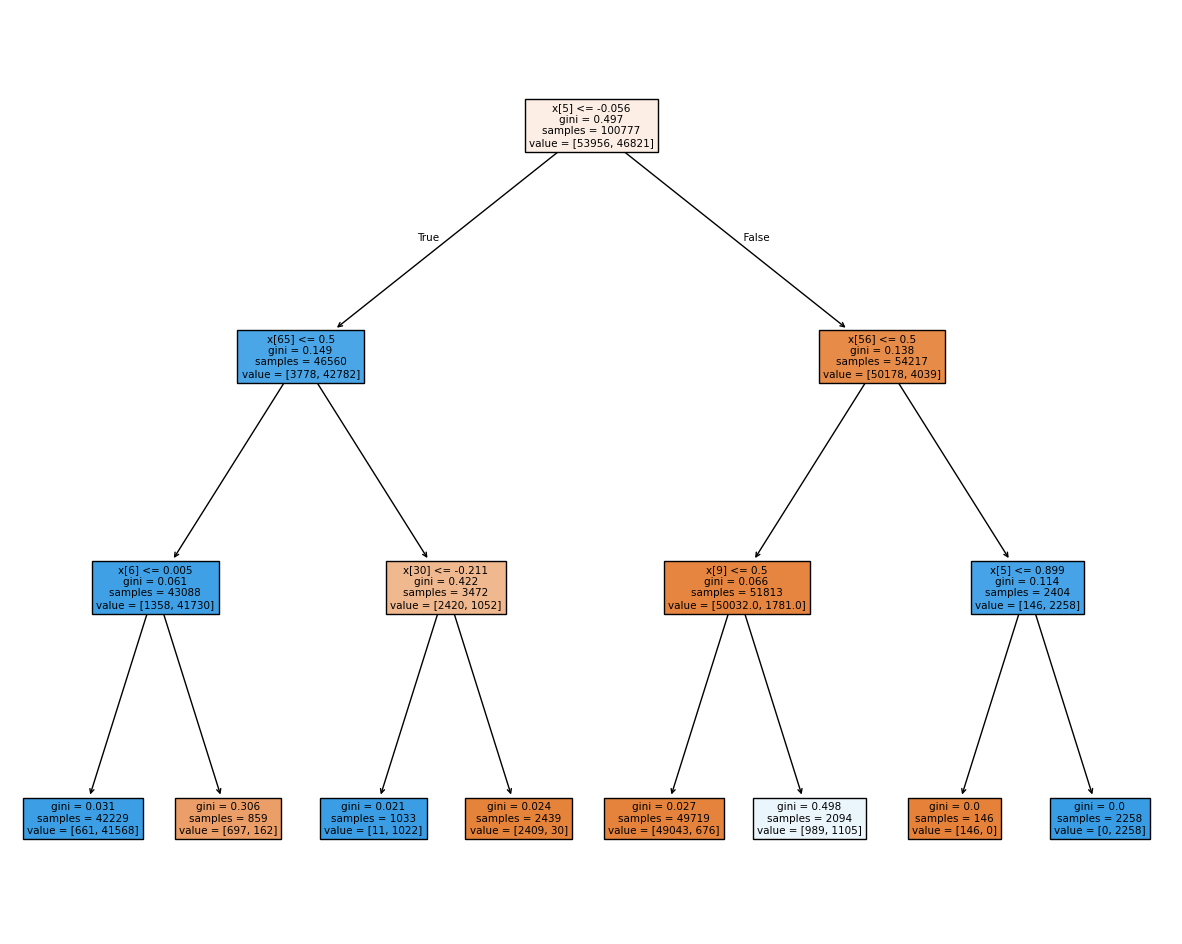

In [19]:
fig=plt.figure(figsize=(15,12))
tree.plot_tree(dt, filled=True)

# Random Forest

RandomForestClassifier:- Training Accuracy:  99.99404626055548 and Test Accuracy:  99.87695971422902
RandomForestClassifier:- Training Precesion:  99.9914571898426 and Test Precision:  99.92370295015259
RandomForestClassifier:- Training Recall:  99.99572841246449 and Test Recall:  99.81370141417563


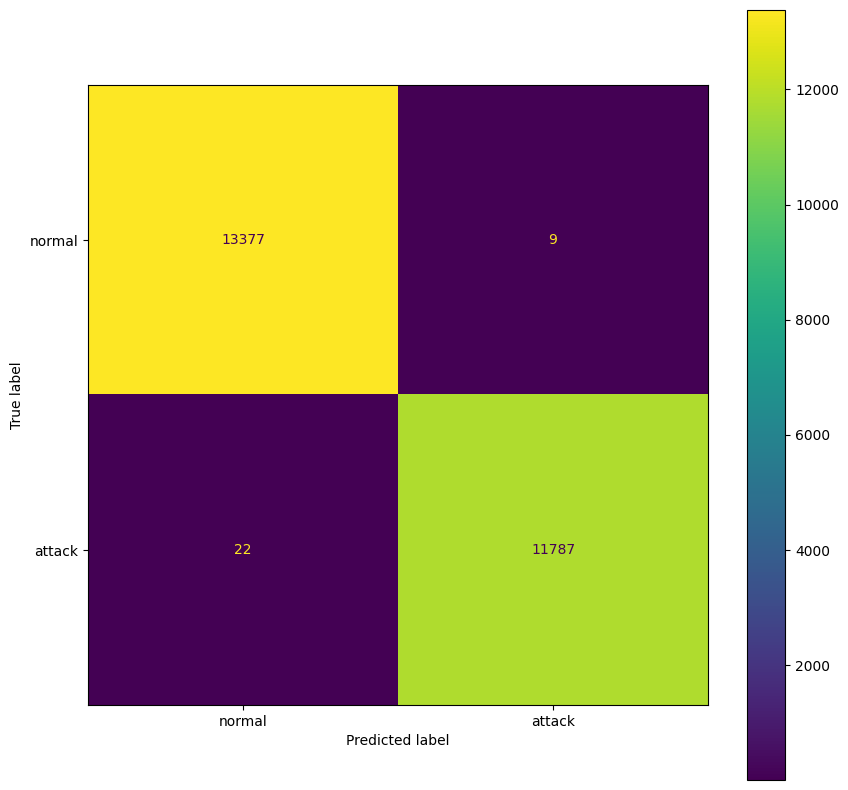

In [20]:
rf=RandomForestClassifier().fit(X_train, y_train)
classification(rf, "RandomForestClassifier", X_train, X_test, y_train, y_test)

# Columns Importance

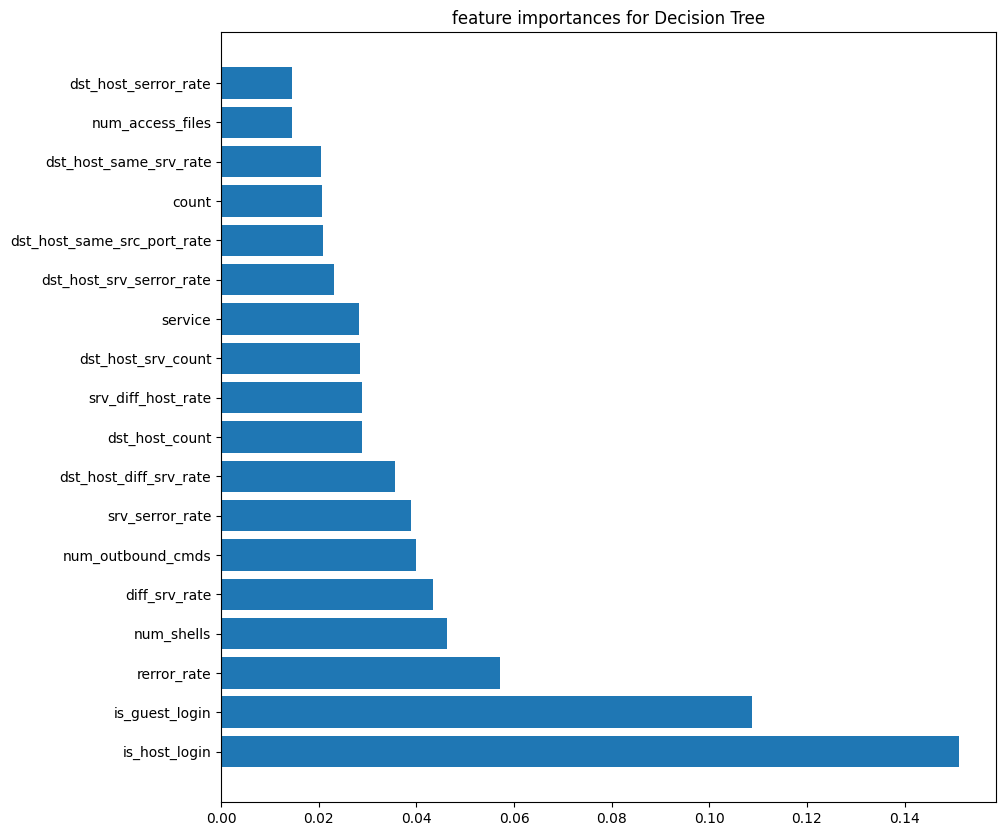

In [21]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

# Random Forest on reduced feature data

PCA RandomForest:- Training Accuracy:  99.99404626055548 and Test Accuracy:  99.8293312165112
PCA RandomForest:- Training Precesion:  99.99359261869674 and Test Precision:  99.91515357203463
PCA RandomForest:- Training Recall:  99.99359261869674 and Test Recall:  99.72055212126344


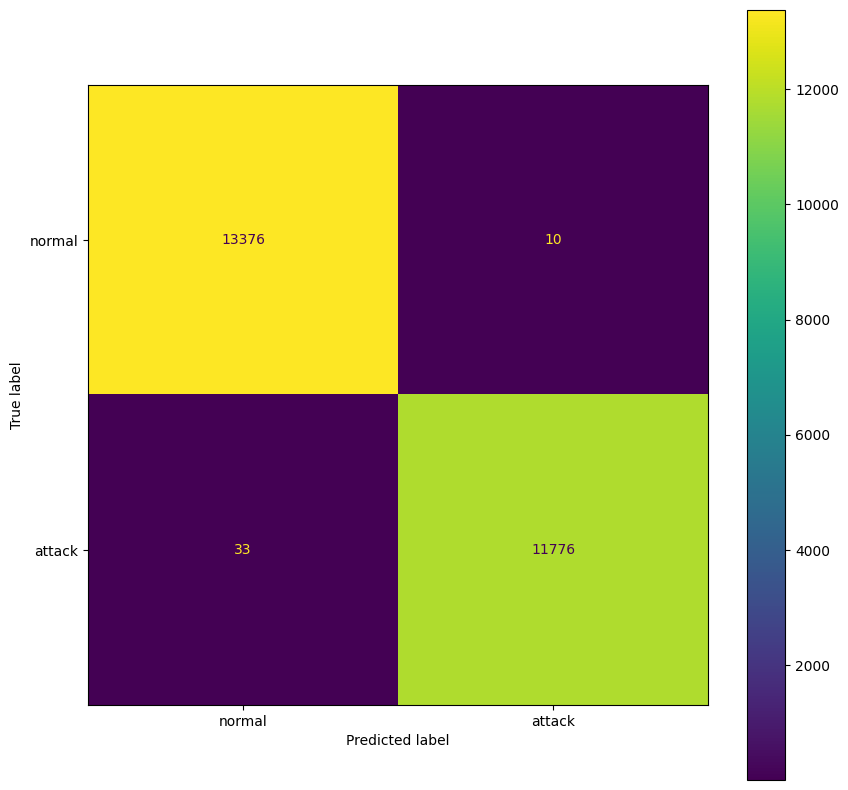

In [22]:
rrf=RandomForestClassifier().fit(X_train_tf, y_train_tf)
classification(rrf, "PCA RandomForest", X_train_tf, X_test_tf, y_train_tf, y_test_tf)

# All models comparison based on accuracy

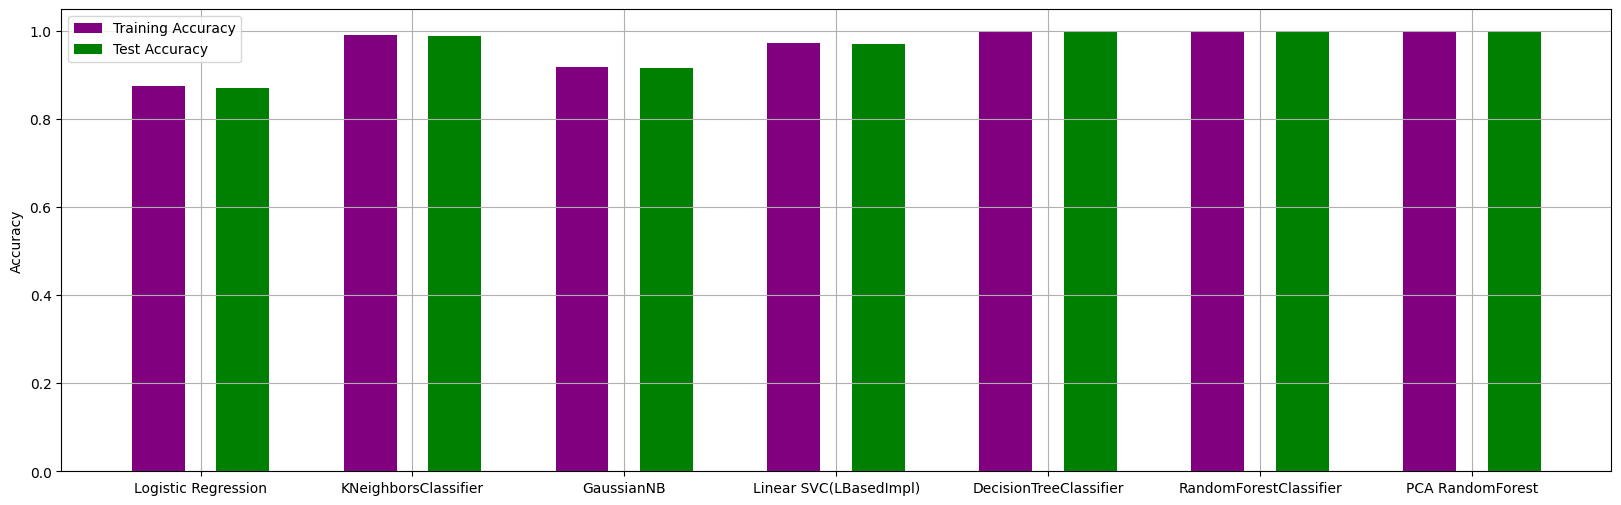

In [23]:
keys=[key for key in kernal_evals.keys()]
values=[value for value in kernal_evals.values()]
fig, ax=plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='purple', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='g', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# All models comparison based on precision

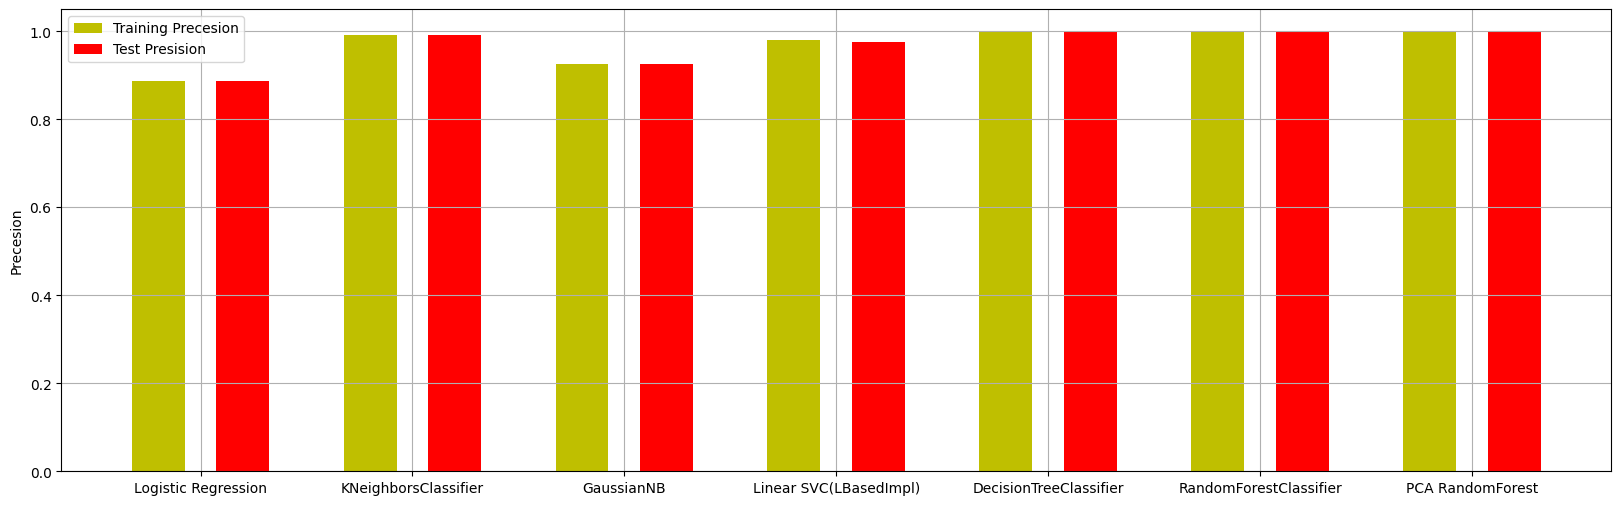

In [24]:
keys=[key for key in kernal_evals.keys()]
values=[value for value in kernal_evals.values()]
fig, ax=plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='y', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='red', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.grid()
plt.show()

# All models comparison based on recall

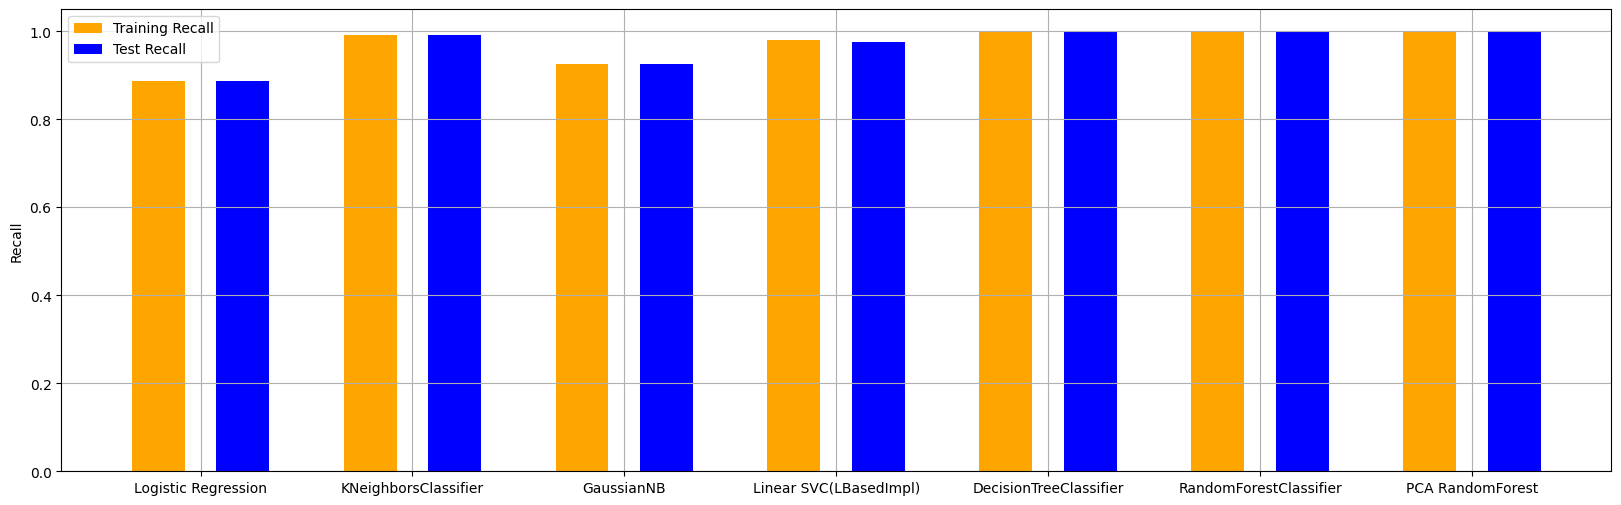

In [25]:
keys=[key for key in kernal_evals.keys()]
values=[value for value in kernal_evals.values()]
fig, ax=plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='orange', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.grid()
plt.show()